## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [1]:
import numpy as np
import pandas as pd

reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)

print(type(reviews))
print(reviews.head())

<class 'pandas.core.frame.DataFrame'>
                                                   0
0  bromwell high is a cartoon comedy . it ran at ...
1  story of a man who has unnatural feelings for ...
2  homelessness  or houselessness as george carli...
3  airport    starts as a brand new luxury    pla...
4  brilliant over  acting by lesley ann warren . ...


**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# * Build a Bag of Words representation of the reviews. (Only containing the 10.000 most frequent words)
vectorizer = CountVectorizer(max_features=10000)

# - Transform the reviews into a Bag of Words representation
X = vectorizer.fit_transform(reviews[0])

# * Show the shape of the matrix
print("Shape of the matrix: ", X.shape)

# * Split the data into a training and a test set (80% training, 20% test)
from sklearn.model_selection import train_test_split

# - Split the data into a training and a test set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# * Split the training data into a training and a validation set (80% training, 20% validation)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

Shape of the matrix:  (25000, 10000)


**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

In [3]:

# * How is a word represented in the Bag of Words? (Print the index of the word 'the')
print("Word 'the' is represented as: ", vectorizer.vocabulary_.get('the'))

# - New line for better readability
print()

# * How does a review look like in the Bag of Words? (Print the first review in the Bag of Words representation)
print("Review 0 in Bag of Words: ", X[0])

# - New line for better readability
print()

# * How many times does the word 'the' appear in the first review?
print("Word 'the' appears in the first review: ", X[0, vectorizer.vocabulary_.get('the')])

# - New line for better readability
print()

# * What is the word with index 4193 in the Bag of Words representation?
print("Word with index 4715: ", list(vectorizer.vocabulary_.keys())[list(vectorizer.vocabulary_.values()).index(4715)])

Word 'the' is represented as:  8945

Review 0 in Bag of Words:    (0, 4193)	5
  (0, 4715)	4
  (0, 1334)	1
  (0, 1735)	1
  (0, 4728)	2
  (0, 7082)	1
  (0, 549)	2
  (0, 8945)	9
  (0, 7663)	1
  (0, 9053)	1
  (0, 501)	2
  (0, 8254)	1
  (0, 6283)	1
  (0, 6897)	1
  (0, 12)	1
  (0, 7737)	2
  (0, 5182)	1
  (0, 8651)	1
  (0, 8864)	4
  (0, 5913)	2
  (0, 9955)	1
  (0, 4473)	2
  (0, 8866)	1
  (0, 6886)	1
  (0, 5099)	1
  :	:
  (0, 9772)	1
  (0, 8593)	2
  (0, 7330)	1
  (0, 9231)	1
  (0, 1180)	1
  (0, 2660)	1
  (0, 4443)	1
  (0, 1597)	1
  (0, 5222)	1
  (0, 4591)	1
  (0, 4171)	1
  (0, 7630)	1
  (0, 6219)	1
  (0, 9974)	1
  (0, 9737)	1
  (0, 3147)	1
  (0, 5465)	1
  (0, 139)	1
  (0, 177)	1
  (0, 8981)	1
  (0, 3277)	1
  (0, 3353)	1
  (0, 9759)	1
  (0, 6610)	1
  (0, 4721)	1

Word 'the' appears in the first review:  9

Word with index 4715:  is


**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

TensorFlow version: 2.17.0-dev20240429
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8821 - loss: 0.8410
Test loss:  0.8673426508903503
Test accuracy:  0.879800021648407


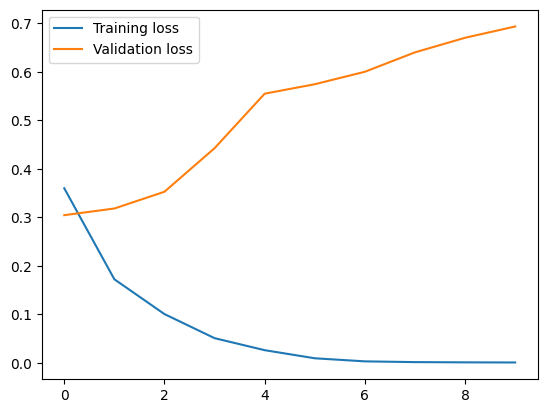

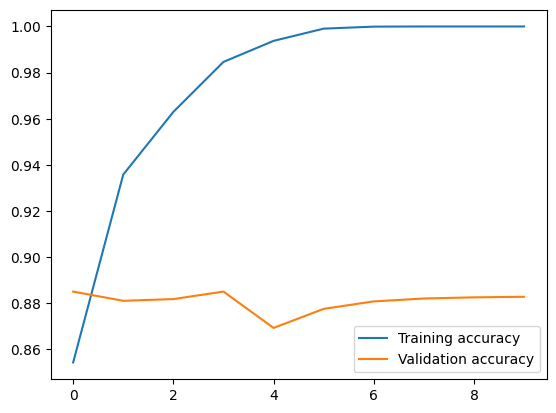

In [17]:

# - Train a neural network with a single hidden layer on the dataset. (Using TensorFlow)
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


# * Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)), # - Input layer with the number of features
    tf.keras.layers.Dense(100, activation='relu'), # - #1 Hidden layer with 100 neurons
    tf.keras.layers.Dense(1, activation='sigmoid') # - Output layer with 1 neuron
])

# * Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# * Train the model
history = model.fit(X_train.toarray(), Y_train, validation_data=(X_val.toarray(), Y_val), epochs=10, batch_size=32, verbose=0,)

# * Evaluate the model
loss, accuracy = model.evaluate(X_test.toarray(), Y_test)
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

# * Plot the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# * Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()


**(d)** Test your sentiment-classifier on the test set.

**(e)** Use the classifier to classify a few sentences you write yourselves. 